<a href="https://colab.research.google.com/github/fsoria/NLP/blob/main/NLP_Reviews_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de reseñas de Netflix

##Abstracto con Motivación y Audiencia

Este proyecto se centra en el análisis de reseñas de usuarios sobre el contenido de Netflix utilizando técnicas de procesamiento de lenguaje natural (NLP). Las reseñas juegan un papel importante en la percepción pública de una plataforma de streaming, ya que los usuarios tienden a basar sus decisiones de visualización en las opiniones de otros. Este análisis está dirigido a profesionales de marketing y gestores de contenido de plataformas de streaming, quienes pueden utilizar estos datos para mejorar la experiencia del usuario, optimizar la recomendación de contenido y ajustar las estrategias de marketing de la plataforma.

##Contexto Comercial y Analítico

Netflix es uno de los servicios de streaming más utilizados a nivel mundial, con millones de suscriptores que acceden a su contenido. Las reseñas y valoraciones de los usuarios influyen directamente en la forma en que otros usuarios perciben las películas y series disponibles en la plataforma. A través del análisis de estas reseñas, Netflix puede identificar patrones de satisfacción e insatisfacción entre los usuarios y mejorar la oferta de contenido. En este sentido aplicar técnicas de NLP permite extraer información valiosa sobre los sentimientos y las temáticas recurrentes dentro de las opiniones de los usuarios, lo que puede ayudar a la plataforma a tomar decisiones informadas sobre la programación, la calidad del contenido y la satisfacción del cliente.


Las preguntas de mi análisis serán las siguientes:

¿Qué proporción de las reseñas de Netflix son positivas o negativas?

Hipótesis: La mayoría de las reseñas son positivas, ya que los usuarios suelen dejar reseñas después de haber finalizado y disfrutado de una serie o película.

¿Cuáles son las palabras o temas recurrentes en las reseñas negativas?

Hipótesis: Los aspectos que más generan insatisfacción pueden estar relacionados con la calidad del contenido, la falta de variedad, o problemas técnicos en la plataforma.

##Objetivo

El objetivo de este proyecto es desarrollar un modelo de análisis de sentimientos que clasifique automáticamente las reseñas de Netflix en dos categorías: positivas o negativas. Este modelo proporcionará información sobre los aspectos que afectan la experiencia de los usuarios en la plataforma.

#Lectura de datos

**Instalación de librerias necesarias**

In [133]:
import pandas as pd
import spacy
import en_core_web_sm
import matplotlib.pyplot as plt
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from imblearn.under_sampling import RandomUnderSampler
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install --upgrade nltk
!python -m spacy download en_core_web_sm
!pip install -U symspellpy
!pip install catboost

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**Lectura del corpus**

In [81]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/fsoria/Deap-Learning/refs/heads/main/netflix_reviews.csv',
    on_bad_lines='skip',
    engine='python',     )

**Análisis inicial**

In [82]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion;;;;
0,8970dbcd-d75f-4016-bb93-efa5de3ef9e6,Mayur Savaliya,Boycott Netflix from Bharat,1,1,8.14.0 build 5 40129,2024-06-14 21:31:07,8.14.0 build 5 40129;;;;
1,a288bc3c-8a90-42d3-b585-1c8078faa96c,Magdalena Glessing,Little good movies and a lot of wonderful TV s...,5,0,8.118.1 build 10 50703,2024-06-14 21:27:26,8.118.1 build 10 50703;;;;
2,f25e40a1-186d-41f3-b707-7d0f6a809803,Maria Poven,What was once a great place to watch many movi...,2,0,8.117.0 build 3 50695,2024-06-14 21:11:51,8.117.0 build 3 50695;;;;
3,41c7b7d4-8237-425c-9e97-b855937ead56,Mārcis Šķēls,Please support material you theming for the ap...,3,0,8.113.2 build 27 50674,2024-06-14 21:10:17,8.113.2 build 27 50674;;;;
4,a3250817-a9e3-4adf-91ea-d67146244d6f,Maria Brilliant,Ilove it because I can watch movies,2,0,NaN,2024-06-14 20:59:45,;;;;


El dataset cuenta con 8 columnas:

**reviewId:** Identificador único de la reseña.

**userName:** Nombre de usuario de la persona que dejó la reseña.

**content:** Contenido de la reseña, que describe la experiencia del usuario con el contenido.

**score:** Calificación otorgada por el usuario (un valor numérico entre 1 y 5).

**thumbsUpCount:** Número de "me gusta" que la reseña ha recibido.

**reviewCreatedVersion:** Versión de la aplicación de Netflix en la que se creó la reseña.

**at:** Fecha en la que se creó la reseña.

**appVersion;;;;**: Versión específica de la aplicación de Netflix utilizada para dejar la reseña.

In [83]:
df.shape

(46576, 8)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46576 entries, 0 to 46575
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              46576 non-null  object
 1   userName              46576 non-null  object
 2   content               46574 non-null  object
 3   score                 46576 non-null  int64 
 4   thumbsUpCount         46576 non-null  int64 
 5   reviewCreatedVersion  40060 non-null  object
 6   at                    46576 non-null  object
 7   appVersion;;;;        46572 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB


Corrección de nombre de columnas

In [85]:
df.rename(columns={"appVersion;;;;": "appVersion"}, inplace=True)

#Análisis exploratorio

##Valores nulos

In [86]:
df.isnull().sum()

,0
reviewId,0
userName,0
content,2
score,0
thumbsUpCount,0
reviewCreatedVersion,6516
at,0
appVersion,4


In [87]:
# Obtener la versión más frecuente de cada columna
most_frequent_review_version = df['reviewCreatedVersion'].value_counts().idxmax()
most_frequent_app_version = df['appVersion'].value_counts().idxmax()

# Reemplazar valores nulos con la versión más frecuente
df['reviewCreatedVersion'].fillna(most_frequent_review_version, inplace=True)
df['appVersion'].fillna(most_frequent_app_version, inplace=True)


<ipython-input-87-ac61b6f95c98>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviewCreatedVersion'].fillna(most_frequent_review_version, inplace=True)
<ipython-input-87-ac61b6f95c98>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [88]:
df.isnull().sum()

,0
reviewId,0
userName,0
content,2
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0


La cantidad de valores nulos en la columna content es insignificante, por lo tanto se procede a reemplazarlos por una cadena vacía

In [89]:
df['content'].fillna('', inplace=True)

<ipython-input-89-f6ed3f99c280>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['content'].fillna('', inplace=True)


In [90]:
df.isnull().sum()

,0
reviewId,0
userName,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0


##Distribucion de score de reseñas

In [91]:
print("\nCantidad de reseñas por score:")
print(df['score'].value_counts())


Cantidad de reseñas por score:
score
1    18860
5    12731
4     5527
3     4972
2     4486
Name: count, dtype: int64


Se observa que la mayoria de las reseñas tienen un score de 1 (negativas) o 5 (positivas), mientras que las reseñas con scores intermedios (2, 3, 4) son mucho menos frecuentes.

In [ ]:
porcentajes = (count_scores / len(df)) * 100
porcentajes

,count
score,
1,40.492958
5,27.333820
4,11.866627
3,10.675026
2,9.631570


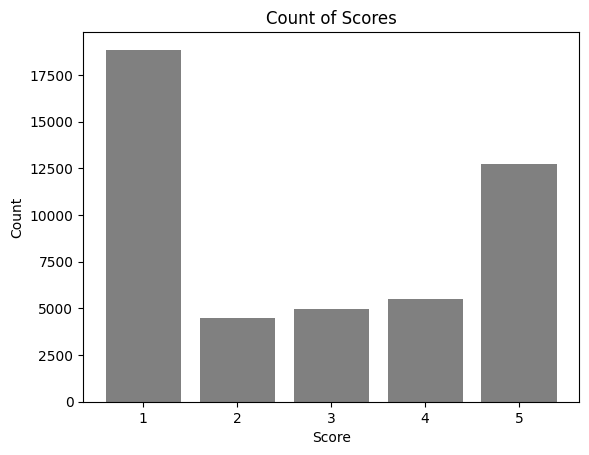

In [142]:
plt.bar(count_scores.index, count_scores.values, color='gray')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Count of Scores')
plt.show()

##Analisis de longitud de frases

In [92]:
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Eliminamos HTML (si lo hay)
    text = re.sub(r'[^\w\s]', '', text)  # Eliminamos puntuación
    tokens = [lemmatizer.lemmatize(word.lower())
              for word in text.split()
              if word.lower() not in stop_words]  # Tokenización, lematización y eliminación de stopwords
    return ' '.join(tokens)  # Unimos los tokens en una cadena

df['cleaned_review'] = df['content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Observamos la columna creada con las reseñas preprocesadas

In [93]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_review
0,8970dbcd-d75f-4016-bb93-efa5de3ef9e6,Mayur Savaliya,Boycott Netflix from Bharat,1,1,8.14.0 build 5 40129,2024-06-14 21:31:07,8.14.0 build 5 40129;;;;,boycott netflix bharat
1,a288bc3c-8a90-42d3-b585-1c8078faa96c,Magdalena Glessing,Little good movies and a lot of wonderful TV s...,5,0,8.118.1 build 10 50703,2024-06-14 21:27:26,8.118.1 build 10 50703;;;;,little good movie lot wonderful tv show
2,f25e40a1-186d-41f3-b707-7d0f6a809803,Maria Poven,What was once a great place to watch many movi...,2,0,8.117.0 build 3 50695,2024-06-14 21:11:51,8.117.0 build 3 50695;;;;,great place watch many movie 2016 till year ha...
3,41c7b7d4-8237-425c-9e97-b855937ead56,Mārcis Šķēls,Please support material you theming for the ap...,3,0,8.113.2 build 27 50674,2024-06-14 21:10:17,8.113.2 build 27 50674;;;;,please support material theming app icon
4,a3250817-a9e3-4adf-91ea-d67146244d6f,Maria Brilliant,Ilove it because I can watch movies,2,0,8.96.1 build 16 50568,2024-06-14 20:59:45,;;;;,ilove watch movie


**Analisis de cantidad palabras por reseña**

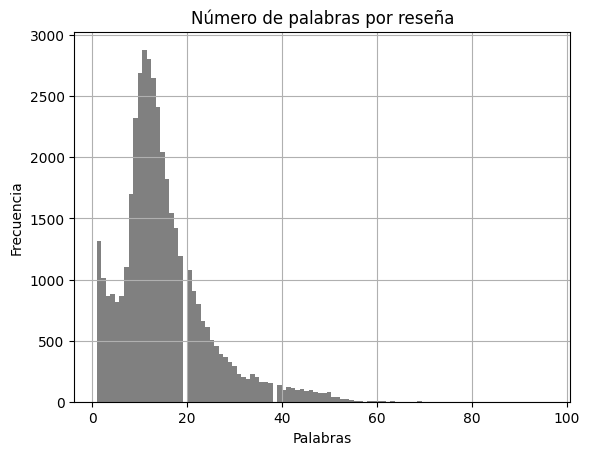

In [144]:
words_per_review = df['cleaned_review'].apply(lambda x: len(x.split(" ")))

words_per_review.hist(bins=100, color='gray')
plt.title('Número de palabras por reseña')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

In [95]:
words_per_review.mean()

15.085623497080041

La media de palabras en las reseñas es de aproximadamente 15 palabras.

**Analisis de cantidad de caracteres por reseña**

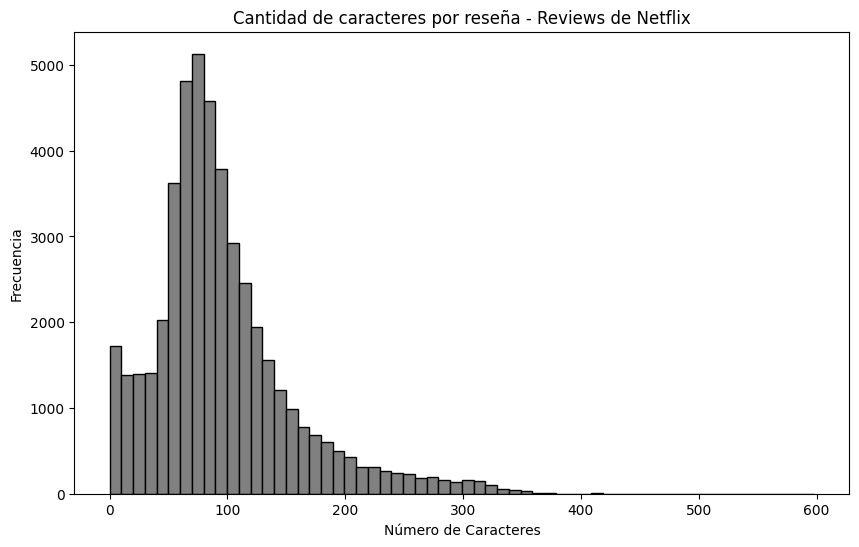

In [106]:
review_lengths = [len(review) for review in df['cleaned_review']]

plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=60, edgecolor='black', color='grey')
plt.title('Cantidad de caracteres por reseña - Reviews de Netflix')
plt.xlabel('Número de Caracteres')
plt.ylabel('Frecuencia')
plt.show()

In [100]:
mean_review_length = np.mean(review_lengths)
print(mean_review_length)

95.30462040535899


La media de caracteres en las reseñas es de aproximadamente 95 caracteres.

**Analisis de frecuencia de palabras**

In [103]:
# Contamos las palabras en el texto procesado
all_words = ' '.join(df['cleaned_review']).split()
word_counts = Counter(all_words)

# Creamos un DataFrame con las palabras y sus frecuencias
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenamos el DataFrame por frecuencia descendente
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

# Mostramos las 20 palabras más comunes
print(word_counts_df.head(20))

        Word  Frequency
1    netflix      20383
54       app      20103
5      movie      14869
9       show      10943
12     watch      10837
4       good       7611
32      like       6955
111     cant       6015
140     love       5794
83      time       5205
50    please       5059
41      dont       5037
366      get       4495
126    phone       4439
76      even       4425
10     great       4307
97        im       4300
116   update       3918
8         tv       3880
168      one       3844


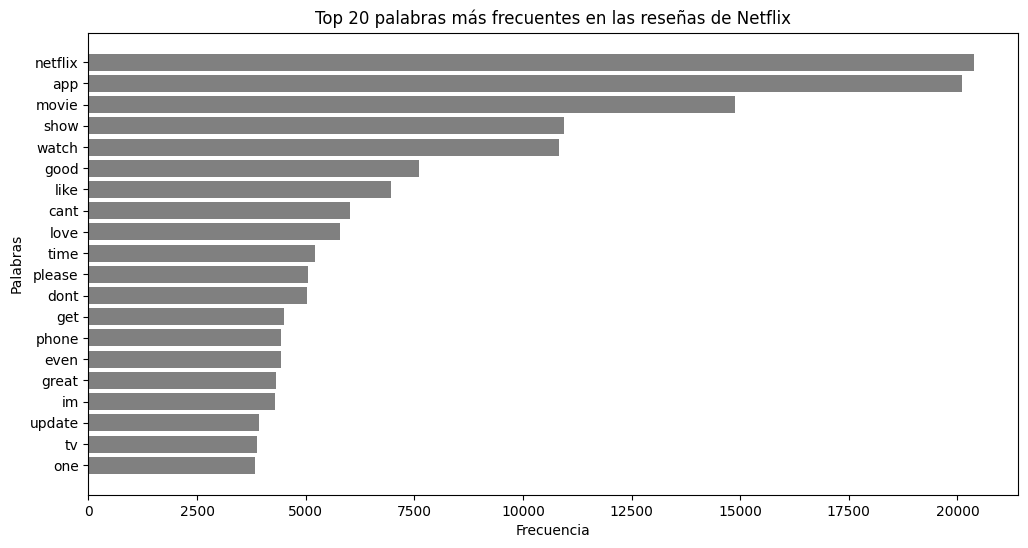

In [107]:
top_words = word_counts_df.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_words['Word'], top_words['Frequency'], color='grey')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('Top 20 palabras más frecuentes en las reseñas de Netflix')
plt.gca().invert_yaxis()
plt.show()

Se eliminan las palabras que no aportan contenido significativo al analisis

         Word  Frequency
9        show      10943
12      watch      10837
4        good       7611
32       like       6955
111      cant       6015
140      love       5794
83       time       5205
50     please       5059
41       dont       5037
366       get       4495
126     phone       4439
76       even       4425
10      great       4307
97         im       4300
116    update       3918
168       one       3844
287    really       3692
221      keep       3599
93        fix       3598
44   watching       3512


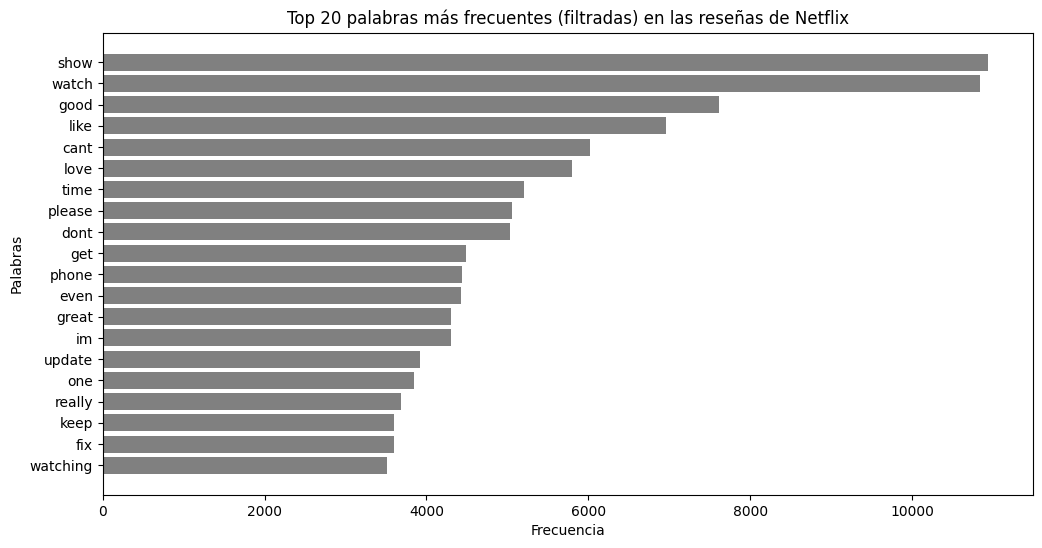

In [111]:
stop_words_custom = {'netflix', 'app', 'movie', 'tv'}

filtered_word_counts_df = word_counts_df[~word_counts_df['Word'].isin(stop_words_custom)]

print(filtered_word_counts_df.head(20))

top_filtered_words = filtered_word_counts_df.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_filtered_words['Word'], top_filtered_words['Frequency'], color='grey')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('Top 20 palabras más frecuentes (filtradas) en las reseñas de Netflix')
plt.gca().invert_yaxis()
plt.show()

##Analisis de las partes del discurso POS

Las 10 partes del discurso más comunes: [('NOUN', 176), ('VERB', 112), ('PROPN', 102), ('ADJ', 89), ('ADV', 30), ('AUX', 23), ('PART', 15), ('PRON', 13), ('INTJ', 10), ('NUM', 9)]


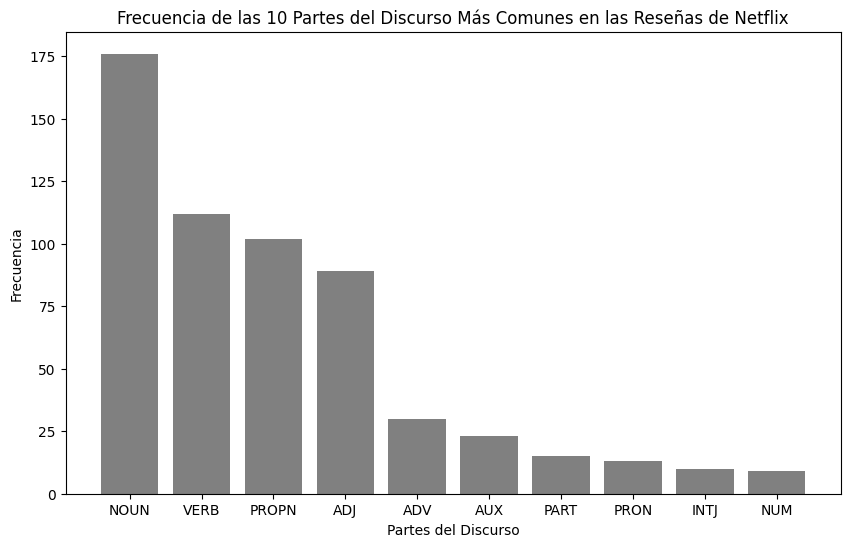

In [112]:
# Cargamos el modelo de spaCy en inglés
nlp = spacy.load('en_core_web_sm')

# Función para obtener las partes del discurso (POS)
def pos_tagging(sentence):
    doc = nlp(sentence)  # No es necesario usar " ".join(sentence) ya que 'sentence' es una cadena
    return [(token.text, token.pos_) for token in doc]

# Aplicamos POS tagging (solo con 100 reviews para que no tarde mucho)
pos_tagged_corpus = [pos_tagging(sentence) for sentence in df['cleaned_review'][:100]]

# Contamos la frecuencia de las partes del discurso
pos_counts = Counter([pos for sentence in pos_tagged_corpus for _, pos in sentence])

# Mostramos las partes del discurso más comunes
most_common_pos = pos_counts.most_common(10)
print("Las 10 partes del discurso más comunes:", most_common_pos)

# Gráfico de las partes del discurso más comunes
pos, counts = zip(*most_common_pos)
plt.figure(figsize=(10, 6))
plt.bar(pos, counts, color='grey')
plt.title('Frecuencia de las 10 Partes del Discurso Más Comunes en las Reseñas de Netflix')
plt.xlabel('Partes del Discurso')
plt.ylabel('Frecuencia')
plt.show()

##Analisis de N-Gramas

In [113]:
# Creamos el CountVectorizer con las stop_words definidas
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Transformamos el texto de la columna 'cleaned_review' en n-gramas
X = vectorizer.fit_transform(df['cleaned_review'])

# Extraemos los n-gramas y sus frecuencias
n_grams = vectorizer.get_feature_names_out()
frequencies = X.toarray().sum(axis=0)

# Creamos un diccionario con los n-gramas y sus frecuencias
n_grams_freq = dict(zip(n_grams, frequencies))

# Convertimos el diccionario en un DataFrame
df_n_grams = pd.DataFrame(n_grams_freq.items(), columns=['n_gram', 'frecuencia'])

df_n_grams = df_n_grams.sort_values(by='frecuencia', ascending=False).reset_index(drop=True)

df_n_grams.head(10)

,n_gram,frecuencia
0,love netflix,1550
1,please fix,1429
2,show movie,1346
3,watch movie,1239
4,tv show,1152
5,good app,1027
6,movie show,972
7,love app,956
8,great app,912
9,want watch,846


##Analisis de la diversidad léxica

In [114]:
# Número total de palabras en el corpus
num_words = sum(len(review.split()) for review in df['cleaned_review'])
print(f"Número total de palabras en el corpus: {num_words}")

# Diversidad léxica
all_words = ' '.join(df['cleaned_review']).split()  # Obtén todas las palabras
num_unique_words = len(set(all_words))  # Calcula el número de palabras únicas
lexical_diversity = num_unique_words / num_words
print(f"Diversidad léxica: {lexical_diversity:.4f}")

Número total de palabras en el corpus: 702526
Diversidad léxica: 0.0374


La diversidad léxica de 0.0374 indica que en promedio hay una palabra única por cada 26.8 palabras en el corpus. Este valor se considera bajo e indica que el vocabulario utilizado en las reseñas de Netflix es relativamente limitado.

##Analisis de palabras con WordCloud

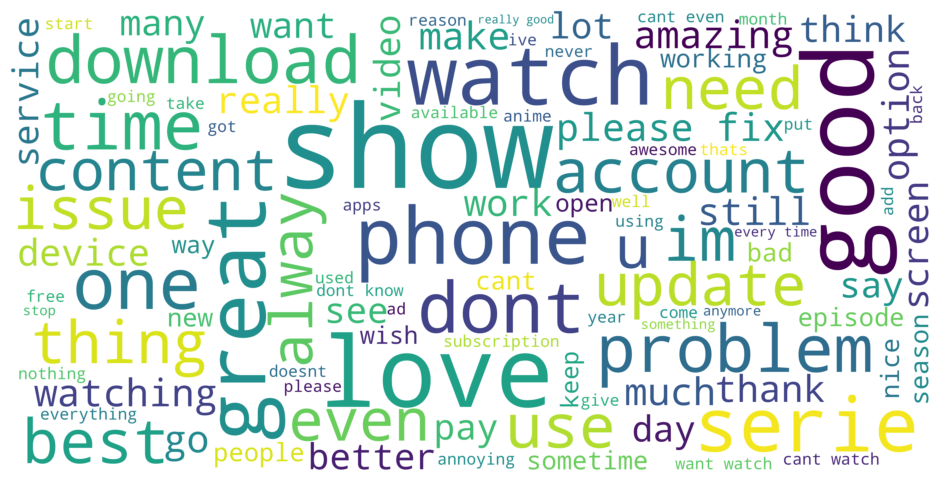

In [118]:
# Combinamos las reseñas en un solo texto
word_cloud_text = ' '.join(df['cleaned_review'])

# Definimos las palabras a excluir
custom_stopwords = {'netflix', 'app', 'movie', 'tv'}

# Combinamos estas con las stopwords predefinidas
stopwords = STOPWORDS.union(custom_stopwords)

# Generamos la nube de palabras
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400,
    stopwords=stopwords
).generate(word_cloud_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

El gráfico de wordcloud muestra que en muchas reseñas se repiten palabras como "show", "love", "good", "phone", "dont", "problem" entre otras.

#Estandarización de datos

Para simplificar el análisis convertiremos la puntuacion de las reseñas en valores binarios de la siguiente manera:

**Puntajes de 4 o 5 seran convertidos a 1 (positivo)**

**Puntajes de 1 o 2 seran convertidos a 0 (negativo)**

**Puntajes de 3 seran removidos por ser valores neutros para este analisis**

In [121]:
# Convertimos los puntajes a valores binarios
df['score'] = np.where(df['score'] >= 4, 1, 0)  # Ratings >= 4 son 1 (positivo), los demás son 0 (negativo)

# Eliminamos las filas con rating 3
df = df[df['score'] != 3]

# Mostramos la cantidad de reseñas por rating binario
print(df['score'].value_counts())

score
0    23346
1    18258
Name: count, dtype: int64


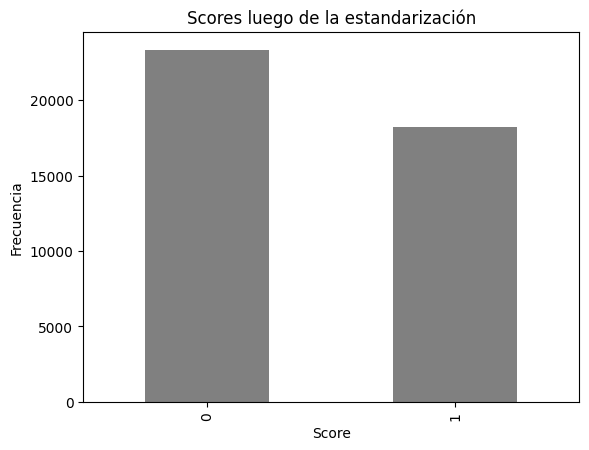

In [123]:
df['Rating'].value_counts().plot.bar(color='gray')
plt.title('Scores luego de la estandarización')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
plt.show()

#Preprocesamiento de texto

##Tokenizacion

In [125]:
# Descargamos recursos de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Inicializamos lematizador y lista de stopwords en inglés
lemmatizer = WordNetLemmatizer()

def tokenize_text(text):
    # Eliminar HTML
    text = re.sub(r'<.*?>', '', text)
    # Convertir a minúsculas y tokenizar
    tokens = text.lower().split()
    return tokens

df['tokenized'] = df['content'].apply(tokenize_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##Eliminación de caracteres especiales

In [126]:
def clean_text(tokens):
    # Eliminar caracteres especiales y puntuación
    cleaned_tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]
    # Eliminar tokens vacíos después de la limpieza
    cleaned_tokens = [token for token in cleaned_tokens if token]
    return cleaned_tokens

df['cleaned_tokens'] = df['tokenized'].apply(clean_text)

##Análisis léxico y morfológico

In [127]:
def analyze_text(tokens):
    # Eliminar stopwords y lematizar
    analyzed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return analyzed_tokens

df['analyzed_tokens'] = df['cleaned_tokens'].apply(analyze_text)

In [128]:
# Unir los tokens analizados
df['cleaned_review'] = df['analyzed_tokens'].apply(lambda tokens: ' '.join(tokens))

Revisamos la columna con las reseñas procesadas

In [129]:
df[['content', 'cleaned_review']].head(10)

,content,cleaned_review
0,Boycott Netflix from Bharat,boycott netflix bharat
1,Little good movies and a lot of wonderful TV s...,little good movie lot wonderful tv show
2,What was once a great place to watch many movi...,great place watch many movie 2016 till year ha...
4,Ilove it because I can watch movies,ilove watch movie
5,Good 👍😊,good
6,Good,good
7,Has lots of diverse characters in shows.,lot diverse character show
8,West aap,west aap
10,How do you subscribe,subscribe
11,Doesn't work.,doesnt work


# Modelo de aprendizaje

##Regresión logistica

In [131]:
# Defino las variables
X = df['cleaned_review']
y = df['Rating']

# Divido en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un pipeline de Bag of word con Logistic Regression
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 4)),  # Usamos n-gramas de 1 a 4 palabras
    LogisticRegression(max_iter=800)  # Clasificador Logistic Regression
)

# Entrenamos el modelo
pipeline.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluamos el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8821055161639226
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4683
           1       0.87      0.86      0.86      3638

    accuracy                           0.88      8321
   macro avg       0.88      0.88      0.88      8321
weighted avg       0.88      0.88      0.88      8321



**Prueba del modelo**

In [132]:
test_phrases = [
    "This show is amazing! I can't stop watching it.",
    "The movie was terrible. I wasted my time.",
    "I loved this series! It's so captivating.",
    "The acting was awful, and the plot was boring.",
    "This documentary is truly inspiring.",
    "I highly recommend this movie to everyone.",
    "The special effects were incredible.",
    "I was disappointed with this show. It's not worth watching.",
    "This is the best movie I've seen in a long time.",
    "The ending was predictable and unsatisfying.",
    "I found this series to be quite enjoyable.",
    "The characters were poorly developed.",
    "This movie is a must-see for all sci-fi fans.",
    "The story was confusing and hard to follow.",
    "I was completely blown away by this film.",
    "This show is a total waste of time.",
    "The animation was stunning.",
    "I couldn't get into this series at all.",
    "This movie is a masterpiece.",
    "I wouldn't recommend this show to anyone."
]

# Probamos el modelo con diferentes frases y mostrar las predicciones
for phrase in test_phrases:
    prediction = pipeline.predict([phrase])
    print(f"Phrase: {phrase}")
    print(f"Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}")  # Mostramos "Positive" o "Negative"
    print('-' * 50)

Phrase: This show is amazing! I can't stop watching it.
Prediction: Positive
--------------------------------------------------
Phrase: The movie was terrible. I wasted my time.
Prediction: Negative
--------------------------------------------------
Phrase: I loved this series! It's so captivating.
Prediction: Positive
--------------------------------------------------
Phrase: The acting was awful, and the plot was boring.
Prediction: Negative
--------------------------------------------------
Phrase: This documentary is truly inspiring.
Prediction: Positive
--------------------------------------------------
Phrase: I highly recommend this movie to everyone.
Prediction: Positive
--------------------------------------------------
Phrase: The special effects were incredible.
Prediction: Positive
--------------------------------------------------
Phrase: I was disappointed with this show. It's not worth watching.
Prediction: Negative
--------------------------------------------------
Phra

El modelo parece estar funcionando bastante bien en general, clasificando correctamente la mayoría de las frases como positivas o negativas. Sin embargo hay algunos casos donde las predicciones son incorrectas.

El modelo clasificó a las siguientes frases como positivas: "The ending was predictable and unsatisfying.", "The story was confusing and hard to follow." y "I was completely blown away by this film."

##Regresion logistica con datos balanceados

In [134]:
# Defino las variables
X = df[['cleaned_review']]
y = df['Rating']

# Aplico el submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Dividimos los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled['cleaned_review'], y_resampled, test_size=0.2, random_state=42)

# Creamos un pipeline de BoW con Logistic Regression
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 4)),
    LogisticRegression(max_iter=800)
)

# Entrenamos el modelo con los datos balanceados
pipeline.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluamos el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.8845837897042717
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      3594
           1       0.90      0.87      0.88      3710

    accuracy                           0.88      7304
   macro avg       0.88      0.88      0.88      7304
weighted avg       0.88      0.88      0.88      7304



**Prueba del modelo**


In [135]:
test_phrases = [
    "This show is amazing! I can't stop watching it.",
    "The movie was terrible. I wasted my time.",
    "I loved this series! It's so captivating.",
    "The acting was awful, and the plot was boring.",
    "This documentary is truly inspiring.",
    "I highly recommend this movie to everyone.",
    "The special effects were incredible.",
    "I was disappointed with this show. It's not worth watching.",
    "This is the best movie I've seen in a long time.",
    "The ending was predictable and unsatisfying.",
    "I found this series to be quite enjoyable.",
    "The characters were poorly developed.",
    "This movie is a must-see for all sci-fi fans.",
    "The story was confusing and hard to follow.",
    "I was completely blown away by this film.",
    "This show is a total waste of time.",
    "The animation was stunning.",
    "I couldn't get into this series at all.",
    "This movie is a masterpiece.",
    "I wouldn't recommend this show to anyone."
]

# Probamos el modelo con diferentes frases y mostrar las predicciones
for phrase in test_phrases:
    prediction = pipeline.predict([phrase])
    print(f"Phrase: {phrase}")
    print(f"Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}")  # Mostramos "Positive" o "Negative"
    print('-' * 50)

Phrase: This show is amazing! I can't stop watching it.
Prediction: Positive
--------------------------------------------------
Phrase: The movie was terrible. I wasted my time.
Prediction: Negative
--------------------------------------------------
Phrase: I loved this series! It's so captivating.
Prediction: Positive
--------------------------------------------------
Phrase: The acting was awful, and the plot was boring.
Prediction: Negative
--------------------------------------------------
Phrase: This documentary is truly inspiring.
Prediction: Positive
--------------------------------------------------
Phrase: I highly recommend this movie to everyone.
Prediction: Positive
--------------------------------------------------
Phrase: The special effects were incredible.
Prediction: Positive
--------------------------------------------------
Phrase: I was disappointed with this show. It's not worth watching.
Prediction: Negative
--------------------------------------------------
Phra

El modelo parece haber mejorado después del balanceo de datos pero aún hay margen de mejora.

Las frases como "The story was confusing and hard to follow" y "I was completely blown away by this film" siguen clasificadas como positivas.

##Regresión logistica con TF-IDF

In [136]:
# Defino las variables
X = df[['cleaned_review']]
y = df['Rating']

# Aplico el submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Dividimos los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled['cleaned_review'], y_resampled, test_size=0.2, random_state=42)

# Creamos un pipeline de TF-IDF con Logistic Regression
pipeline = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 4), max_features=5000, min_df=5),
    LogisticRegression(max_iter=800)
)

# Entrenamos el modelo con los datos balanceados
pipeline.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluamos el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.8823932092004381
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      3594
           1       0.91      0.86      0.88      3710

    accuracy                           0.88      7304
   macro avg       0.88      0.88      0.88      7304
weighted avg       0.88      0.88      0.88      7304



Prueba del modelo

In [137]:
# Definimos frases de prueba para probar el modelo (adaptadas a Netflix)
test_phrases = [
    "This show is amazing! I can't stop watching it.",
    "The movie was terrible. I wasted my time.",
    "I loved this series! It's so captivating.",
    "The acting was awful, and the plot was boring.",
    "This documentary is truly inspiring.",
    "I highly recommend this movie to everyone.",
    "The special effects were incredible.",
    "I was disappointed with this show. It's not worth watching.",
    "This is the best movie I've seen in a long time.",
    "The ending was predictable and unsatisfying.",
    "I found this series to be quite enjoyable.",
    "The characters were poorly developed.",
    "This movie is a must-see for all sci-fi fans.",
    "The story was confusing and hard to follow.",
    "I was completely blown away by this film.",
    "This show is a total waste of time.",
    "The animation was stunning.",
    "I couldn't get into this series at all.",
    "This movie is a masterpiece.",
    "I wouldn't recommend this show to anyone."
]

# Probamos el modelo con diferentes frases y mostrar las predicciones
for phrase in test_phrases:
    prediction = pipeline.predict([phrase])
    print(f"Phrase: {phrase}")
    print(f"Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}")  # Mostramos "Positive" o "Negative"
    print('-' * 50)

Phrase: This show is amazing! I can't stop watching it.
Prediction: Positive
--------------------------------------------------
Phrase: The movie was terrible. I wasted my time.
Prediction: Negative
--------------------------------------------------
Phrase: I loved this series! It's so captivating.
Prediction: Positive
--------------------------------------------------
Phrase: The acting was awful, and the plot was boring.
Prediction: Negative
--------------------------------------------------
Phrase: This documentary is truly inspiring.
Prediction: Positive
--------------------------------------------------
Phrase: I highly recommend this movie to everyone.
Prediction: Positive
--------------------------------------------------
Phrase: The special effects were incredible.
Prediction: Positive
--------------------------------------------------
Phrase: I was disappointed with this show. It's not worth watching.
Prediction: Negative
--------------------------------------------------
Phra

En general las predicciones con TF-IDF son muy similares a las obtenidas con CountVectorizer y datos balanceados.

##Random Forest

In [138]:
# Defino las variables
X = df[['cleaned_review']]
y = df['Rating']

# Aplico el submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Dividimos los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled['cleaned_review'], y_resampled, test_size=0.2, random_state=42)

# Creamos un pipeline de TF-IDF con Random Forest
pipeline = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 4), max_features=5000, min_df=5),
    RandomForestClassifier(random_state=42)  # Usamos RandomForestClassifier
)

# Entrenamos el modelo con los datos balanceados
pipeline.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluamos el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Accuracy: 0.8645947426067908
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3594
           1       0.88      0.85      0.86      3710

    accuracy                           0.86      7304
   macro avg       0.86      0.86      0.86      7304
weighted avg       0.87      0.86      0.86      7304



**Prueba del modelo**

In [139]:
test_phrases = [
    "This show is amazing! I can't stop watching it.",
    "The movie was terrible. I wasted my time.",
    "I loved this series! It's so captivating.",
    "The acting was awful, and the plot was boring.",
    "This documentary is truly inspiring.",
    "I highly recommend this movie to everyone.",
    "The special effects were incredible.",
    "I was disappointed with this show. It's not worth watching.",
    "This is the best movie I've seen in a long time.",
    "The ending was predictable and unsatisfying.",
    "I found this series to be quite enjoyable.",
    "The characters were poorly developed.",
    "This movie is a must-see for all sci-fi fans.",
    "The story was confusing and hard to follow.",
    "I was completely blown away by this film.",
    "This show is a total waste of time.",
    "The animation was stunning.",
    "I couldn't get into this series at all.",
    "This movie is a masterpiece.",
    "I wouldn't recommend this show to anyone."
]

# Probamos el modelo con diferentes frases y mostrar las predicciones
for phrase in test_phrases:
    prediction = pipeline.predict([phrase])
    print(f"Phrase: {phrase}")
    print(f"Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}")  # Mostramos "Positive" o "Negative"
    print('-' * 50)

Phrase: This show is amazing! I can't stop watching it.
Prediction: Positive
--------------------------------------------------
Phrase: The movie was terrible. I wasted my time.
Prediction: Negative
--------------------------------------------------
Phrase: I loved this series! It's so captivating.
Prediction: Positive
--------------------------------------------------
Phrase: The acting was awful, and the plot was boring.
Prediction: Negative
--------------------------------------------------
Phrase: This documentary is truly inspiring.
Prediction: Positive
--------------------------------------------------
Phrase: I highly recommend this movie to everyone.
Prediction: Positive
--------------------------------------------------
Phrase: The special effects were incredible.
Prediction: Positive
--------------------------------------------------
Phrase: I was disappointed with this show. It's not worth watching.
Prediction: Negative
--------------------------------------------------
Phra

El modelo Random Forest incluso con balanceo de datos y TF-IDF parece tener dificultades para capturar la connotación negativa en algunas frases.

Clasificó incorrectamente como positivas a las siguientes frases: "The ending was predictable and unsatisfying.", "The story was confusing and hard to follow.""I was completely blown away by this film."

#Conclusión

El objetivo principal de este proyecto fue desarrollar un modelo de análisis de sentimientos capaz de clasificar automáticamente las reseñas de Netflix como positivas o negativas, con el fin de obtener información sobre los aspectos que influyen en la experiencia del usuario al utilizar la plataforma.

Inicialmente se probó un modelo de Regresión Logística utilizando la técnica de Bag of Words  para representar el texto de las reseñas. Luego se probó la representación de texto mediante TF-IDF y también se aplicó balanceo de datos para disminuir el desbalance entre clases.

Se observó que la Regresión Logística con datos balanceados y la Regresión Logística con TF-IDF obtuvieron resultados similares y un rendimiento levemente superior al modelo inicial que utilizaba BoW.

Como alternativa se entrenó el modelo de Random Forest con balanceo de datos y TF-IDF, aunque el desempeño fue inferior a los modelos de Regresión Logística.

En conclusión el proyecto ha cumplido su objetivo principal de desarrollar un modelo de análisis de sentimientos para las reseñas de Netflix. El modelo seleccionado es la Regresión Logística con datos balanceados ya que fue el que mejor metricas obtuvo.